In [4]:
import numpy as np
names = ["Ava", "Jasper", "Lila", "Nolan", "Maren", "Theo", "Elodie", "Kai", "Isla", "Silas", "Tessa", "Remy", "Soren", "Quinn", "Briar"]
fruits = [
    "Apple", "Apricot", "Avocado", "Banana", "Blackberry", "Blackcurrant", "Blueberry", "Boysenberry",
    "Breadfruit", "Cantaloupe", "Carambola", "Cherimoya", "Cherry", "Clementine", "Cloudberry", "Coconut",
    "Cranberry", "Currant", "Date", "Dragonfruit", "Durian", "Elderberry", "Feijoa", "Fig", "Goji berry",
    "Gooseberry", "Grape", "Grapefruit", "Guava", "Hackberry", "Honeyberry", "Honeydew", "Huckleberry",
    "Imbe", "Indian Fig", "Jabuticaba", "Jackfruit", "Jambul", "Jujube", "Juniper berry", "Kaffir Lime",
    "Kiwano", "Kiwi", "Kumquat", "Langsat", "Lemon", "Lime", "Longan", "Loquat"
]
def generate_table(seed, difficulty):
    background_color = "BLACK"
    text_color = "WHITE"
    if difficulty == 9:
        background_color = "WHITE"
        text_color = "BLACK"
    if difficulty == 7:
        background_color = "RED"
        text_color = "BLACK"
    np.random.seed(seed)
    random_headers = ["number", "weight (lb)", "calories", "protein", "sugar (g)", "score", "distractor"]
    chosen_fruits = "\\text{" + np.random.choice(fruits, min(len(fruits), 3 + difficulty), replace=False) + "}"
    headers = list("\\text{" + np.random.choice(random_headers, min(len(random_headers), 1 + (difficulty+1)//2), replace=False) + "}")
    if difficulty >= 7:
        rows = [[chosen_fruits[k]] +\
                list(np.round(np.clip(np.random.normal(np.random.uniform(20, 80), 25/(1+difficulty), len(headers)+1), 0, 100), 2)) 
                for k in range(len(chosen_fruits))]
    elif difficulty >= 4:
        rows = [[chosen_fruits[k]] +\
                list(np.round(np.clip(np.random.normal(np.random.uniform(20, 80), 25/(1+difficulty), len(headers)+1), 0, 100), 1)) 
                for k in range(len(chosen_fruits))]
    else:
        rows = [[chosen_fruits[k]] +\
                list(np.random.randint(20, 80, len(headers)+1)) 
                for k in range(len(chosen_fruits))]
    for r in rows:
        r[1] = str(r[1]) + "\\text{ dollars}"
    bought_fruits = np.random.choice(range(len(rows)), difficulty+1, replace=False)
    bought_fruits = [(rows[i][0], np.float64(rows[i][1][0:rows[i][1].find("\\")])) for i in bought_fruits]
    amounts = np.random.randint(2, 10, difficulty+1)
    amount_text = ""
    if difficulty == 0:
        amount_text = f"{amounts[0]} {bought_fruits[0][0][6:-1]}s"
    else:
        for i, (f, _) in enumerate(bought_fruits[:-1]):
            amount_text += f"{amounts[i]} {f[6:-1]}s, "
        if difficulty == 1: amount_text = amount_text[:-2] + " "
        amount_text += f"and {amounts[-1]} {bought_fruits[-1][0][6:-1]}s"
    answer = round(sum(amounts[i] * bought_fruits[i][1] for i in range(difficulty+1)), 2)
    if difficulty < 4: answer = int(answer)
    question = f"Question: {np.random.choice(names)} wants to buy {amount_text.replace(",", ",\n")}. How much does it cost?\nPlease answer with a just a number and nothing else"
    with open(f"table-44/44_{seed}_{difficulty}.py", "w") as file:
        file.write(f'''from manim import *
                   
config.background_color = {background_color}

class GroundingSegmentationTable(Scene):
    def construct(self):
        title = Text(\'\'\'{question}\'\'\', font_size=20, color={text_color})
        title.to_edge(UP)
        self.play(Write(title))
        self.wait(0.5)
        self.play(FadeOut(title))
        headers = [\"\\\\text{{fruit}}\", \"\\\\text{{price per kg}}\"] + {headers}
        rows = {rows}
        table_data = [headers] + rows
        table = MathTable(
            table_data,
            include_outer_lines=True,
            h_buff=0.5,
            v_buff=0.3,
        ).scale(0.55)
        for entry in table.get_entries():
                entry.set_color({text_color})
        for line in table.get_horizontal_lines() + table.get_vertical_lines():
            line.set_color({text_color})
        self.play(Create(table.get_horizontal_lines()[0]), run_time=0.5)
        self.play(Create(table.get_vertical_lines()), run_time=0.5)
        self.play(Create(table.get_horizontal_lines()[1:]), run_time=0.5)
        for i in range(0, len(table_data)):
            self.play(FadeIn(table.get_rows()[i]), run_time=0.5)
            self.play(FadeOut(table.get_rows()[i]), run_time=0.5)
                   ''')
    return question, answer


Image ID: 15


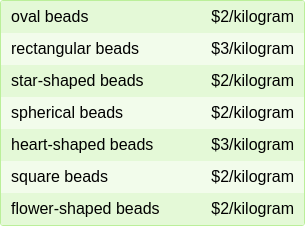

Question:
Hint: Please answer the question requiring an integer answer and provide the final value, e.g., 1, 2, 3, at the end.
Question: Chase wants to buy 4 kilograms of oval beads and 5 kilograms of star-shaped beads. How much will he spend? (Unit: $)

Answer:
18


In [5]:
from IPython.display import display, Video
from datasets import load_dataset
dataset = load_dataset("AI4Math/MathVista")
data = dataset["testmini"]
example = data[43]
print(f"\nImage ID: {15}")
display(example["decoded_image"])
question = example["query"]
print(f"Question:\n{question}")
answer = example["answer"]
print(f"\nAnswer:\n{answer}")

In [6]:
import subprocess

for difficulty in range(10):
    seed = 46
    question, answer = generate_table(seed, difficulty)
    subprocess.run(f"manim -ql table-44/44_{seed}_{difficulty}.py GroundingSegmentationTable")
    print(question)
    print(f"Answer: {answer}$")
    display(Video(f"media/videos/44_{seed}_{difficulty}/480p15/GroundingSegmentationTable.mp4", embed=True))
    if difficulty in {4, 7, 9}:
        with open('combined_questions.csv', 'a+') as file:
            file.write(f"media/videos/44_{seed}_{difficulty}/480p15/GroundingSegmentationTable.mp4, {answer}, {question}\n")

Question: Elodie wants to buy 8 Kiwis. How much does it cost?
Please answer with a just a number and nothing else
Answer: 544$


Question: Maren wants to buy 8 Jabuticabas and 5 Bananas. How much does it cost?
Please answer with a just a number and nothing else
Answer: 347$


Question: Theo wants to buy 3 Clementines,
 2 Kiwis,
 and 4 Bananas. How much does it cost?
Please answer with a just a number and nothing else
Answer: 267$


Question: Soren wants to buy 6 Bananas,
 7 Blackberrys,
 8 Clementines,
 and 4 Jabuticabas. How much does it cost?
Please answer with a just a number and nothing else
Answer: 1067$


Question: Theo wants to buy 5 Bananas,
 8 Jabuticabas,
 2 Blackberrys,
 4 Clementines,
 and 2 Kiwis. How much does it cost?
Please answer with a just a number and nothing else
Answer: 894.7$


Question: Jasper wants to buy 3 Carambolas,
 4 Clementines,
 9 Cantaloupes,
 6 Blueberrys,
 2 Blackberrys,
 and 7 Bananas. How much does it cost?
Please answer with a just a number and nothing else
Answer: 1054.1$


Question: Isla wants to buy 9 Jabuticabas,
 9 Gooseberrys,
 3 Cantaloupes,
 7 Blackberrys,
 9 Blueberrys,
 5 Carambolas,
 and 2 Clementines. How much does it cost?
Please answer with a just a number and nothing else
Answer: 1555.6$


Question: Ava wants to buy 7 Kiwis,
 3 Carambolas,
 5 Clementines,
 8 Blackberrys,
 9 Gooseberrys,
 3 Cantaloupes,
 8 Cloudberrys,
 and 5 Jabuticabas. How much does it cost?
Please answer with a just a number and nothing else
Answer: 2461.88$


Question: Ava wants to buy 8 Blueberrys,
 2 Carambolas,
 8 Blackberrys,
 7 Cantaloupes,
 2 Jabuticabas,
 4 Kiwis,
 7 Bananas,
 6 Cloudberrys,
 and 8 Clementines. How much does it cost?
Please answer with a just a number and nothing else
Answer: 2647.15$


Question: Quinn wants to buy 8 Loquats,
 6 Gooseberrys,
 7 Kiwis,
 5 Bananas,
 7 Blueberrys,
 5 Cloudberrys,
 2 Blackberrys,
 2 Boysenberrys,
 8 Clementines,
 and 7 Carambolas. How much does it cost?
Please answer with a just a number and nothing else
Answer: 2826.67$
